# TECH CHALLENGE 2 - Prophet


TECH CHALLENGE 2

#Estudando e preparando os dados os Dados


In [1]:
!pip install prophet

  Using cached prophet-1.1.7-py3-none-win_amd64.whl.metadata (3.6 kB)
Using cached prophet-1.1.7-py3-none-win_amd64.whl (13.3 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\T-GAMER\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\T-GAMER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

df_ibovespa = pd.read_csv(r"C:\Users\T-GAMER\Documents\Estudos_Matheus_2025\dados_pos\Notebook - Dados Hist√≥ricos - Ibovespa.csv")

df_ibovespa.head()

Data   √öltimo  Abertura   M√°xima   M√≠nima   Vol.    Var%
0  01.07.2025  139.549   138.855  139.695  138.855  6,35M   0,50%
1  30.06.2025  138.855   136.865  139.103  136.430  7,68B   1,45%
2  27.06.2025  136.866   137.113  137.209  136.469  6,24B  -0,18%
3  26.06.2025  137.114   135.767  137.353  135.756  8,02B   0,99%
4  25.06.2025  135.767   137.163  137.163  135.565  7,71B  -1,02%

In [3]:
df_ibovespa['Data'] = pd.to_datetime(
    df_ibovespa['Data'],
    format='%d.%m.%Y',
    errors='raise'
)

df_ibovespa["Vol."] = df_ibovespa["Vol."].str.replace("M", "e6").str.replace("B", "e9").str.replace("K", "e3").str.replace(",", ".").astype(float)

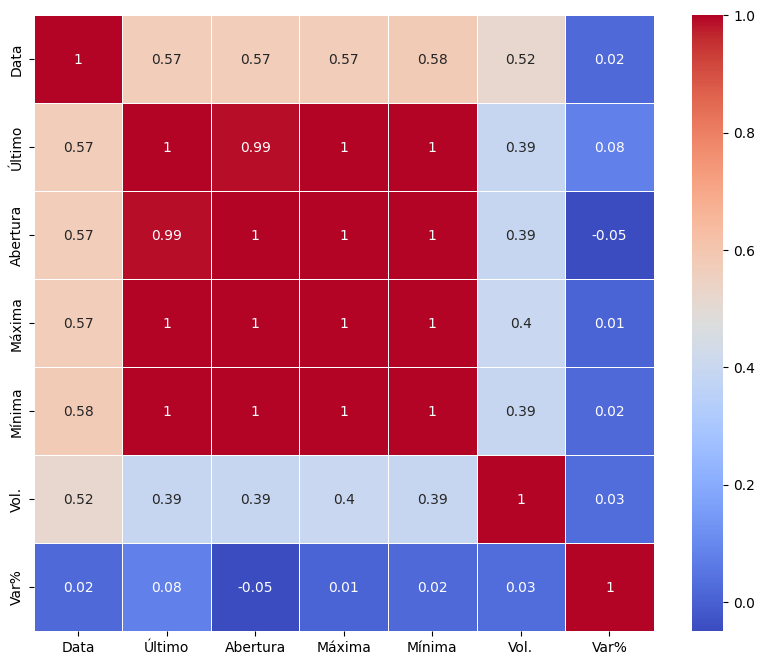

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_ibovespa['Var%'] = df_ibovespa['Var%'].astype(str).str.replace('%', '').str.replace(',', '.').astype(float) / 100

correlation_metrics = df_ibovespa.corr().round(2)

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(correlation_metrics, annot=True,linewidths= .5, ax=ax, cmap="coolwarm")

plt.show()

In [5]:
df_ibovespa.isnull().sum()

Data        0
√öltimo      0
Abertura    0
M√°xima      0
M√≠nima      0
Vol.        0
Var%        0
dtype: int64

#Iniciando o modelo

In [6]:
from sklearn import metrics
from prophet.plot import add_changepoints_to_plot
from prophet.plot import plot_cross_validation_metric
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation

C:\Users\T-GAMER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [7]:
df_ibovespa.rename(columns={'Data': 'ds', '√öltimo': 'y'}, inplace=True)
df_ibovespa.head()

ds        y  Abertura   M√°xima   M√≠nima          Vol.    Var%
0 2025-07-01  139.549   138.855  139.695  138.855  6.350000e+06  0.0050
1 2025-06-30  138.855   136.865  139.103  136.430  7.680000e+09  0.0145
2 2025-06-27  136.866   137.113  137.209  136.469  6.240000e+09 -0.0018
3 2025-06-26  137.114   135.767  137.353  135.756  8.020000e+09  0.0099
4 2025-06-25  135.767   137.163  137.163  135.565  7.710000e+09 -0.0102

In [8]:
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        1119 non-null   datetime64[ns]
 1   y         1119 non-null   float64       
 2   Abertura  1119 non-null   float64       
 3   M√°xima    1119 non-null   float64       
 4   M√≠nima    1119 non-null   float64       
 5   Vol.      1119 non-null   float64       
 6   Var%      1119 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 61.3 KB


In [9]:
df_ibovespa.set_index('ds', inplace=True)

df_ibovespa.reset_index(inplace=True)

train_set = df_ibovespa.iloc[:-30]

test_set = df_ibovespa.iloc[-30:]

m = Prophet()

m.fit(df_ibovespa)

20:36:44 - cmdstanpy - INFO - Chain [1] start processing
20:36:44 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=60, freq='B')

forecast = m.predict(future)

#Apresentando os resultados

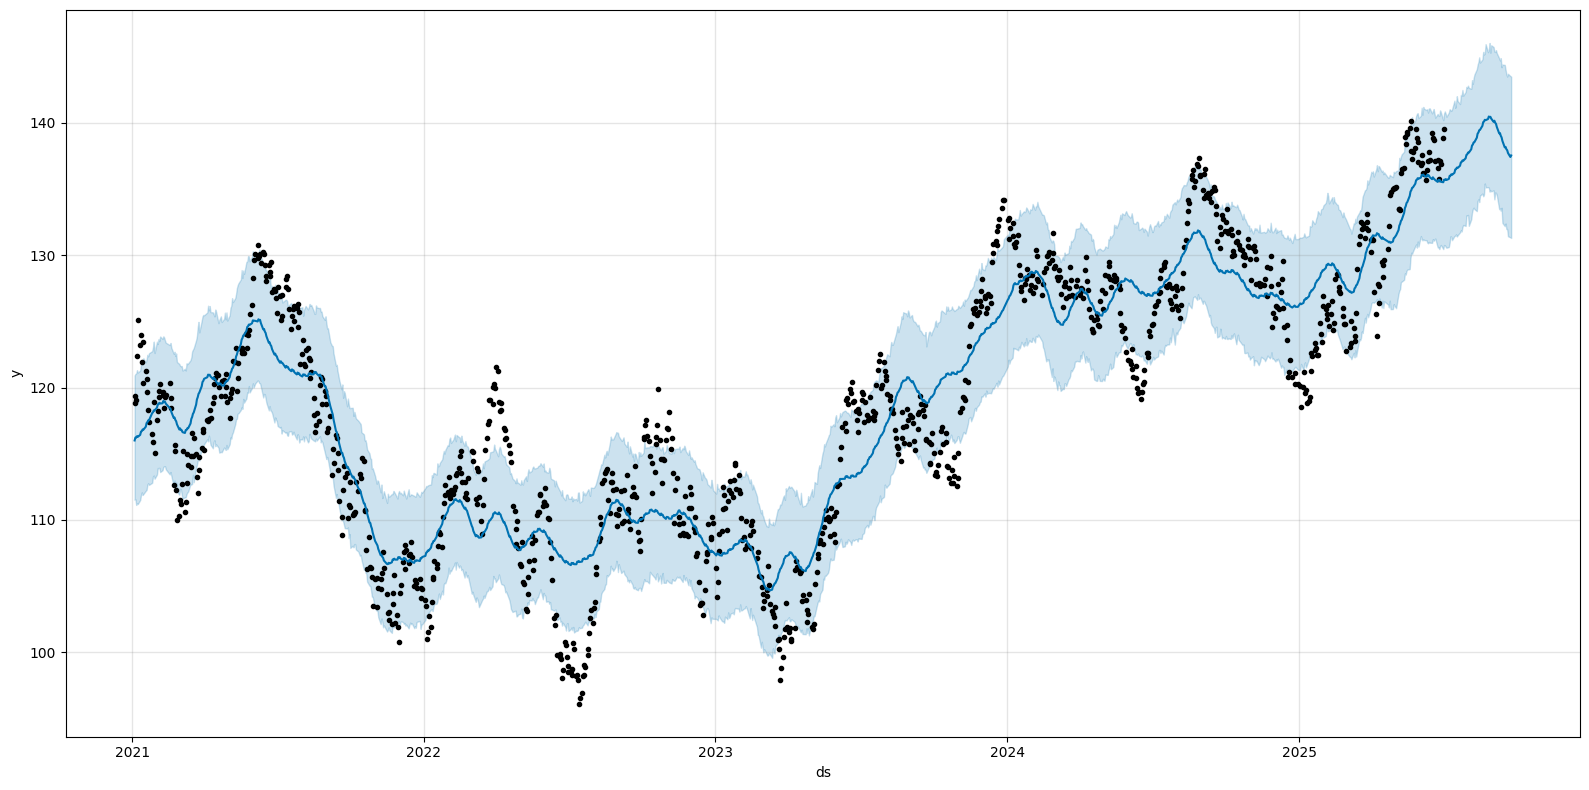

In [11]:
fig = m.plot(forecast, figsize=(16, 8))

In [12]:
import pandas as pd
import numpy as np

# Garante que as datas est√£o como datetime
df_ibovespa['ds'] = pd.to_datetime(df_ibovespa['ds'])
forecast['ds']    = pd.to_datetime(forecast['ds'])

# Data de corte (√∫ltimo ponto real)
data_corte = df_ibovespa['ds'].max()

# Pr√≥ximos 30 dias previstos
forecast_future_30 = (
    forecast[
        (forecast['ds'] > data_corte) &
        (forecast['ds'] <= data_corte + pd.Timedelta(days=30))
    ]
    .copy()
    .reset_index(drop=True)
)

# 1) Pega o √∫ltimo valor real do IBOVESPA
last_real = df_ibovespa.loc[df_ibovespa['ds'] == data_corte, 'y'].values[0]

# 2) Cria coluna com o ‚Äúvalor do dia anterior‚Äù para comparar
forecast_future_30['prev'] = forecast_future_30['yhat'].shift(1)
forecast_future_30.loc[0, 'prev'] = last_real

# 3) Define Tend√™ncia: Subir se yhat > prev, sen√£o Descer
forecast_future_30['Tend√™ncia'] = np.where(
    forecast_future_30['yhat'] > forecast_future_30['prev'],
    'Subir',
    'Descer'
)

# 4) Monta a tabela final
tabela = forecast_future_30[['ds', 'yhat', 'Tend√™ncia']]
tabela.columns = ['Data', 'Previs√£o_IBOVESPA', 'Tend√™ncia_Pr√≥ximo_Dia']

# 5) Exibe
print(tabela.to_string(index=False))


      Data  Previs√£o_IBOVESPA Tend√™ncia_Pr√≥ximo_Dia
2025-07-02         135.676683                Descer
2025-07-03         135.750650                 Subir
2025-07-04         135.681200                Descer
2025-07-07         135.763499                 Subir
2025-07-08         135.993576                 Subir
2025-07-09         136.002853                 Subir
2025-07-10         136.110193                 Subir
2025-07-11         136.071405                Descer
2025-07-14         136.227313                 Subir
2025-07-15         136.475518                 Subir
2025-07-16         136.499794                 Subir
2025-07-17         136.619181                 Subir
2025-07-18         136.589742                Descer
2025-07-21         136.761161                 Subir
2025-07-22         137.011853                 Subir
2025-07-23         137.038121                 Subir
2025-07-24         137.159540                 Subir
2025-07-25         137.132704                Descer
2025-07-2

#Testando modelo #


In [13]:
m = Prophet()
m.fit(train_set)

20:36:45 - cmdstanpy - INFO - Chain [1] start processing
20:36:45 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future_test = test_set[['ds']]  # s√≥ as datas
forecast_test = m.predict(future_test)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Valores reais
y_true = test_set['y'].values

# Previs√µes do modelo
y_pred = forecast_test['yhat'].values

# M√©tricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 7.262081454628685
MSE: 57.182392202284376
RMSE: 7.56190400641825


In [16]:
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 6.04%


21:30:07 - cmdstanpy - INFO - Chain [1] start processing



üìà Previs√µes dos pr√≥ximos 30 dias:

      Data  Previs√£o_IBOVESPA Tend√™ncia_Pr√≥ximo_Dia  Varia√ß√£o_%
2025-07-02             135.68                Descer       -2.77
2025-07-03             135.75                 Subir        0.05
2025-07-04             135.68                Descer       -0.05
2025-07-07             135.76                 Subir        0.06
2025-07-08             135.99                 Subir        0.17
2025-07-09             136.00                 Subir        0.01
2025-07-10             136.11                 Subir        0.08
2025-07-11             136.07                Descer       -0.03
2025-07-14             136.23                 Subir        0.11
2025-07-15             136.48                 Subir        0.18
2025-07-16             136.50                 Subir        0.02
2025-07-17             136.62                 Subir        0.09
2025-07-18             136.59                Descer       -0.02
2025-07-21             136.76                 Subir       

21:30:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\T-GAMER\AppData\Local\Temp\ipykernel_5684\3089085010.py:105: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\T-GAMER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


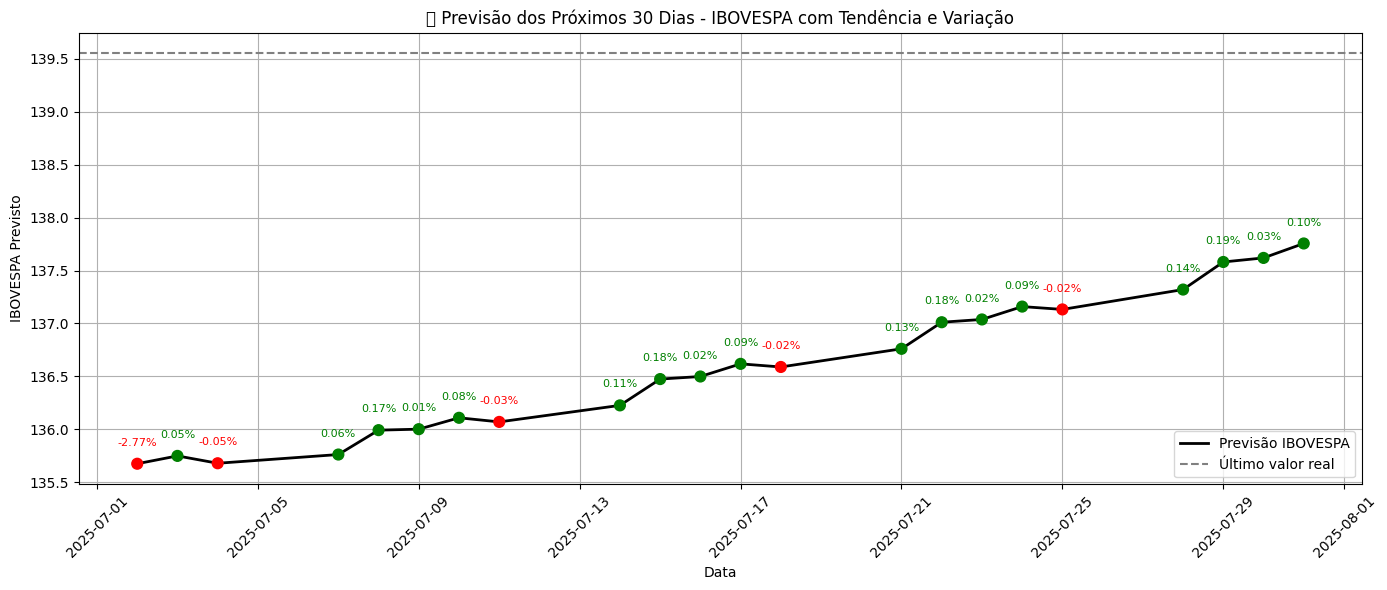

In [26]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Tratamento de datas ---
df_ibovespa['ds'] = pd.to_datetime(df_ibovespa['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# √öltimo valor real do IBOVESPA
last_real = df_ibovespa.loc[df_ibovespa['ds'] == df_ibovespa['ds'].max(), 'y'].values[0]

# Previs√£o dos pr√≥ximos 30 dias
data_corte = df_ibovespa['ds'].max()
forecast_future_30 = forecast[
    (forecast['ds'] > data_corte) &
    (forecast['ds'] <= data_corte + pd.Timedelta(days=30))
].copy().reset_index(drop=True)

# Valor do dia anterior (shift) e varia√ß√£o
forecast_future_30['prev'] = forecast_future_30['yhat'].shift(1)
forecast_future_30.loc[0, 'prev'] = last_real

forecast_future_30['Tend√™ncia'] = np.where(
    forecast_future_30['yhat'] > forecast_future_30['prev'],
    'Subir',
    'Descer'
)

forecast_future_30['Varia√ß√£o_%'] = ((forecast_future_30['yhat'] - forecast_future_30['prev']) / forecast_future_30['prev']) * 100

tabela = forecast_future_30[['ds', 'yhat', 'Tend√™ncia', 'Varia√ß√£o_%']].copy()
tabela.columns = ['Data', 'Previs√£o_IBOVESPA', 'Tend√™ncia_Pr√≥ximo_Dia', 'Varia√ß√£o_%']
tabela['Previs√£o_IBOVESPA'] = tabela['Previs√£o_IBOVESPA'].round(2)
tabela['Varia√ß√£o_%'] = tabela['Varia√ß√£o_%'].round(2)

print("\nüìà Previs√µes dos pr√≥ximos 30 dias:\n")
print(tabela.to_string(index=False))


# --- Avalia√ß√£o do modelo ---
y_true = test_set['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("\nüîç M√©tricas de desempenho do modelo:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

m = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # opcional
m.fit(train_set)

import matplotlib.pyplot as plt

data_limite = df_ibovespa['ds'].max() - pd.Timedelta(days=30)

df_real_3m = df_ibovespa[df_ibovespa['ds'] >= data_limite]
forecast_3m = forecast[forecast['ds'] >= data_limite]

# --- Gr√°fico da Previs√£o Futura (Pr√≥ximos 30 dias) ---
# plt.figure(figsize=(12, 6))
# plt.plot(forecast_future_30['ds'], forecast_future_30['yhat'], label='Previs√£o - Pr√≥ximos 30 dias', color='blue', marker='o')
# plt.title('üìÜ Previs√£o dos Pr√≥ximos 30 Dias - IBOVESPA')
# plt.xlabel('Data')
# plt.ylabel('Previs√£o do IBOVESPA')
# plt.grid(True)
# plt.legend()
# plt.axhline(y=last_real, color='gray', linestyle='--', label='√öltimo valor real')
# plt.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

# Mapa de cores baseado na tend√™ncia
cores = forecast_future_30['Tend√™ncia'].map({'Subir': 'green', 'Descer': 'red'})

plt.figure(figsize=(14, 6))
plt.plot(forecast_future_30['ds'], forecast_future_30['yhat'], color='black', linewidth=2, label='Previs√£o IBOVESPA')
plt.scatter(forecast_future_30['ds'], forecast_future_30['yhat'], color=cores, s=60, zorder=5)

# Adiciona varia√ß√£o percentual como r√≥tulo
for i, row in forecast_future_30.iterrows():
    plt.text(row['ds'], row['yhat'] + 0.15, f"{row['Varia√ß√£o_%']:.2f}%", 
             ha='center', va='bottom', fontsize=8, color=cores[i])

# Linha horizontal com √∫ltimo valor real
plt.axhline(y=last_real, color='gray', linestyle='--', label='√öltimo valor real')

plt.title('üìä Previs√£o dos Pr√≥ximos 30 Dias - IBOVESPA com Tend√™ncia e Varia√ß√£o')
plt.xlabel('Data')
plt.ylabel('IBOVESPA Previsto')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

